#### Imports

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Global variables

In [2]:
# The models with different sealing mechanism used in this test.
rings = ['O-ring','NAPN','NAP310','PK','KDN','O-ring257','X-ring257']
# The models with different cross-sectional shape used in this test.
shapes = ['Circle','Stadium','Kidney','Stadium_lc','Kidney_lc']
# Remove first 15 data points to avoid deviating starting values
drop_amount = 15 

# Static leakage test

In [3]:
# Define a dictionary to store all data from the static tests
# For each ring all variables are stored in this nested dictionary
static_leakage = {}

# For each model type
for model in rings+shapes:
    # Load the data of the corresponding results in .CSV and drop unncessary columns
    model_df = pd.read_csv(f'./data/static/{model}.csv',delimiter='\s+',header=None,names=(['Time','A','B','C','Laser(mm)','Pressure(bar)','Force(N)']))
    model_df.drop(columns=['A','B','C'],index=model_df.index[range(drop_amount)],axis=1,inplace=True)
    
    # Store the data in our larger dictionary
    static_leakage[model] = {}
    # Filtering the data with a rolling window and sampling the data (in s)
    static_leakage[model]['Time'] = model_df['Time'].head(130000).rolling(window=100).mean()[::1000]/1000
    # Define the pressure drop by reducing each pressure value with the first pressure value (in bar)
    static_leakage[model]['PressureDrop(bar)'] = model_df['Pressure(bar)'] - model_df['Pressure(bar)'][drop_amount]
    # Filtering the pressure with a rolling window and sampling the data (in MPa)
    static_leakage[model]['Pressure(bar)'] = model_df['Pressure(bar)'].head(130000).rolling(window=100).mean()[::1000]/10
    # Filtering the pressure with a rolling window and sampling the data (in MPa)
    static_leakage[model]['PressureDrop(bar)'] = static_leakage[model]['PressureDrop(bar)'].head(130000).rolling(window=100).mean()[::1000]/10
    # Ensure the first value is equal to 0
    static_leakage[model]['PressureDrop(bar)'][drop_amount] = 0

#### Static leakage plot 25mm

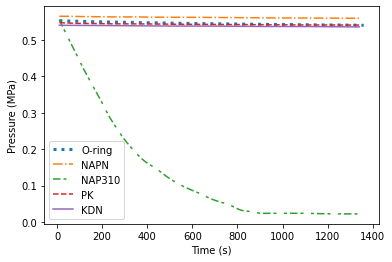

In [4]:
plt.plot(static_leakage['O-ring']['Time'],static_leakage['O-ring']['Pressure(bar)'],'tab:blue',label='O-ring',linestyle='dotted',linewidth=3)    
plt.plot(static_leakage['NAPN']['Time'],static_leakage['NAPN']['Pressure(bar)'],'tab:orange',label='NAPN',linestyle='dashdot')
plt.plot(static_leakage['NAP310']['Time'],static_leakage['NAP310']['Pressure(bar)'],'tab:green',label='NAP310', linestyle=(0,(5,2,2)))
plt.plot(static_leakage['PK']['Time'],static_leakage['PK']['Pressure(bar)'],'tab:red',label='PK',linestyle='dashed')
plt.plot(static_leakage['KDN']['Time'],static_leakage['KDN']['Pressure(bar)'],'tab:purple',label='KDN')

# Set the labels and save the figure
plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.legend()
plt.savefig('./figures/result_static_leakage_25mm.pdf',bbox_inches = 'tight')

#### Static leakage plot 25mm (without NAP310 for clarity)

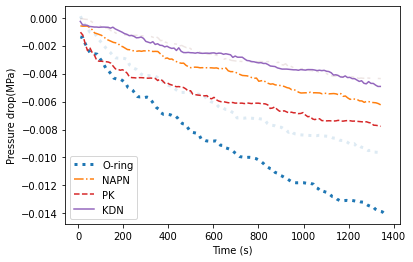

In [5]:
plt.plot(static_leakage['O-ring257']['Time'],static_leakage['O-ring257']['PressureDrop(bar)'],'tab:blue',alpha=0.15, linestyle='dotted',linewidth=3)
plt.plot(static_leakage['X-ring257']['Time'],static_leakage['X-ring257']['PressureDrop(bar)'],'tab:brown',alpha=0.15, linestyle=(0,(5,2,2)))
plt.plot(static_leakage['O-ring']['Time'],static_leakage['O-ring']['PressureDrop(bar)'],'tab:blue',label='O-ring',linestyle='dotted',linewidth=3)   
plt.plot(static_leakage['NAPN']['Time'],static_leakage['NAPN']['PressureDrop(bar)'],'tab:orange',label='NAPN',linestyle='dashdot')
plt.plot(static_leakage['PK']['Time'],static_leakage['PK']['PressureDrop(bar)'],'tab:red',label='PK',linestyle='dashed')
plt.plot(static_leakage['KDN']['Time'],static_leakage['KDN']['PressureDrop(bar)'],'tab:purple',label='KDN')

# Set the labels and save the figure
plt.xlabel('Time (s)')
plt.ylabel('Pressure drop(MPa)')
plt.legend()
plt.savefig('./figures/result_static_leakage_25mm_part.pdf',bbox_inches = 'tight')

#### Static leakage plot 25.7mm (without NAP310 for clarity)

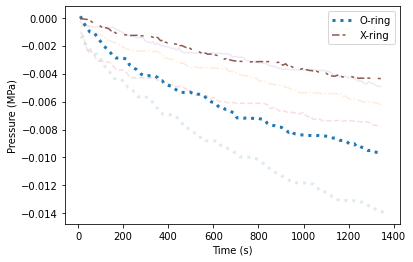

In [6]:
plt.plot(static_leakage['O-ring']['Time'],static_leakage['O-ring']['PressureDrop(bar)'],'tab:blue',alpha=0.15, linestyle='dotted',linewidth=3)   
plt.plot(static_leakage['NAPN']['Time'],static_leakage['NAPN']['PressureDrop(bar)'],'tab:orange',alpha=0.15, linestyle='dashdot')
plt.plot(static_leakage['PK']['Time'],static_leakage['PK']['PressureDrop(bar)'],'tab:red',alpha=0.15,linestyle='dashed')
plt.plot(static_leakage['KDN']['Time'],static_leakage['KDN']['PressureDrop(bar)'],'tab:purple',alpha=0.15)
plt.plot(static_leakage['O-ring257']['Time'],static_leakage['O-ring257']['PressureDrop(bar)'],'tab:blue',label='O-ring',linestyle='dotted',linewidth=3)
plt.plot(static_leakage['X-ring257']['Time'],static_leakage['X-ring257']['PressureDrop(bar)'],'tab:brown',label='X-ring', linestyle=(0,(5,2,2)))

# Set the labels and save the figure
plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.legend()
plt.savefig('./figures/result_static_leakage_257mm.pdf',bbox_inches = 'tight')

#### Static leakage plot different shapes

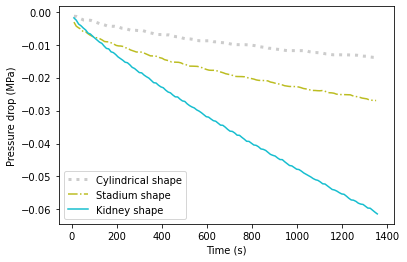

In [7]:
plt.plot(static_leakage['Circle']['Time'],static_leakage['Circle']['PressureDrop(bar)'],'0.8',label='Cylindrical shape', linestyle='dotted',linewidth=3)  
plt.plot(static_leakage['Stadium']['Time'],static_leakage['Stadium']['PressureDrop(bar)'],'tab:olive',label='Stadium shape',linestyle='dashdot')
plt.plot(static_leakage['Kidney']['Time'],static_leakage['Kidney']['PressureDrop(bar)'],'tab:cyan',label='Kidney shape')

# Set the labels and save the figure
plt.xlabel('Time (s)')
plt.ylabel('Pressure drop (MPa)')
plt.legend()
plt.savefig('./figures/result_static_leakage_shapes.pdf',bbox_inches = 'tight')

#### Static leakage plot different shapes with lower clearance

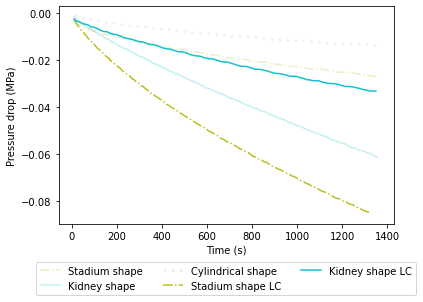

In [8]:
plt.plot(static_leakage['Stadium']['Time'],static_leakage['Stadium']['PressureDrop(bar)'],'tab:olive',alpha=0.25,label='Stadium shape',linestyle='dashdot')
plt.plot(static_leakage['Kidney']['Time'],static_leakage['Kidney']['PressureDrop(bar)'],'tab:cyan',alpha=0.25,label='Kidney shape')
plt.plot(static_leakage['Circle']['Time'],static_leakage['Circle']['PressureDrop(bar)'],'0.8',alpha=0.25,label='Cylindrical shape', linestyle='dotted',linewidth=3)  
plt.plot(static_leakage['Stadium_lc']['Time'],static_leakage['Stadium_lc']['PressureDrop(bar)'],'tab:olive',label='Stadium shape LC',linestyle='dashdot')
plt.plot(static_leakage['Kidney_lc']['Time'],static_leakage['Kidney_lc']['PressureDrop(bar)'],'tab:cyan',label='Kidney shape LC')

# Set the labels and save the figure
plt.xlabel('Time (s)')
plt.ylabel('Pressure drop (MPa)')
plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.35),ncol=3)
plt.savefig('./figures/app_static_leakage_shapes_lc.pdf',bbox_inches = 'tight')

# Repeatablilty

### Reconnected

In [9]:
# Store repeatability data in a dictionary
static_reconnected = {}

# Iterate all 3 repeated tests and add them to the dictionary
for test in range(1,4):
    # Load the data of the corresponding results of the O-ring 25.7 mm in .CSV and drop unncessary columns
    test_df = pd.read_csv(f'./data/repeatability/reconnected/static/{test}_O-ring257.csv',delimiter='\s+',header=None,names=(['Time','A','B','C','Laser(mm)','Pressure(bar)','Force(N)']))
    test_df.drop(columns=['A','B','C'],index=test_df.index[range(drop_amount)],axis=1,inplace=True)
    
    # Store the data in the dictionary
    static_reconnected[test] = {}    
    # Filtering the data with a rolling window and sampling the data (in s)
    static_reconnected[test]['Time'] = test_df['Time'].head(130000).rolling(window=100).mean()[::1000]/1000
    # Define the pressure drop by reducing each pressure value with the first pressure value (in bar)
    static_reconnected[test]['PressureDrop(bar)'] = test_df['Pressure(bar)'] - test_df['Pressure(bar)'][drop_amount]
    # Filtering the pressure with a rolling window and sampling the data (in MPa)
    static_reconnected[test]['Pressure(bar)'] = test_df['Pressure(bar)'].head(130000).rolling(window=100).mean()[::1000]/10
    # Filtering the pressure with a rolling window and sampling the data (in MPa)
    static_reconnected[test]['PressureDrop(bar)'] = static_reconnected[test]['PressureDrop(bar)'].head(130000).rolling(window=100).mean()[::1000]/10
    # Ensure the first value is equal to 0
    static_reconnected[test]['PressureDrop(bar)'][drop_amount] = 0

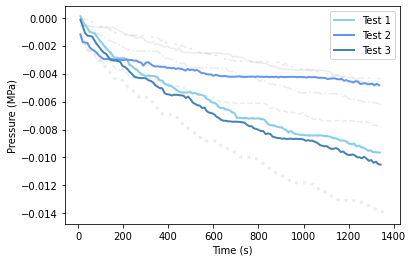

In [10]:
# Substracting the initial pressure from the data to account for pressure drop
plt.plot(static_leakage['O-ring']['Time'],static_leakage['O-ring']['PressureDrop(bar)'],'tab:grey',alpha=0.15, linestyle='dotted',linewidth=3)   
plt.plot(static_leakage['NAPN']['Time'],static_leakage['NAPN']['PressureDrop(bar)'],'tab:grey',alpha=0.15, linestyle='dashdot')
plt.plot(static_leakage['PK']['Time'],static_leakage['PK']['PressureDrop(bar)'],'tab:grey',alpha=0.15,linestyle='dashed')
plt.plot(static_leakage['KDN']['Time'],static_leakage['KDN']['PressureDrop(bar)'],'tab:grey',alpha=0.15)
plt.plot(static_leakage['O-ring257']['Time'],static_leakage['O-ring257']['PressureDrop(bar)'],'tab:grey',alpha=0.15,linestyle='dotted',linewidth=3)
plt.plot(static_leakage['X-ring257']['Time'],static_leakage['X-ring257']['PressureDrop(bar)'],'tab:grey',alpha=0.15, linestyle=(0,(5,2,2)))
plt.plot(static_reconnected[1]['Time'],static_reconnected[1]['PressureDrop(bar)'],'skyblue',label='Test 1',linewidth=2)
plt.plot(static_reconnected[2]['Time'],static_reconnected[2]['PressureDrop(bar)'],'cornflowerblue',label='Test 2',linewidth=2)
plt.plot(static_reconnected[3]['Time'],static_reconnected[3]['PressureDrop(bar)'],'steelblue',label='Test 3',linewidth=2)

# Set the labels and save the figure
plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.legend()
plt.savefig('./figures/app_static_leakage_reconnected.pdf',bbox_inches = 'tight')

### Rerun

In [11]:
# Store repeatability data in a dictionary
static_rerun = {}

# Iterate all 3 repeated tests and add them to the dictionary
for test in range(1,4):
    test_df = pd.read_csv(f'./data/repeatability/rerun/static/{test}_O-ring257.csv',delimiter='\s+',header=None,names=(['Time','A','B','C','Laser(mm)','Pressure(bar)','Force(N)']))
    test_df.drop(columns=['A','B','C'],index=test_df.index[range(drop_amount)],axis=1,inplace=True)
    
    # Store the data in the dictionary
    static_rerun[test] = {}
    # Filtering the data with a rolling window and sampling the data (in s)
    static_rerun[test]['Time'] = test_df['Time'].head(130000).rolling(window=100).mean()[::1000]/1000
    # Define the pressure drop by reducing each pressure value with the first pressure value (in bar)
    static_rerun[test]['PressureDrop(bar)'] = test_df['Pressure(bar)'] - test_df['Pressure(bar)'][drop_amount]
    # Filtering the pressure with a rolling window and sampling the data (in MPa)
    static_rerun[test]['Pressure(bar)'] = test_df['Pressure(bar)'].head(130000).rolling(window=100).mean()[::1000]/10
    # Filtering the pressure with a rolling window and sampling the data (in MPa)
    static_rerun[test]['PressureDrop(bar)'] = static_rerun[test]['PressureDrop(bar)'].head(130000).rolling(window=100).mean()[::1000]/10
    # Ensure the first value is equal to 0
    static_rerun[test]['PressureDrop(bar)'][drop_amount] = 0

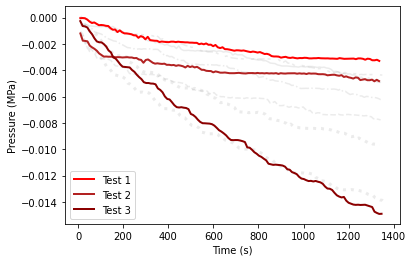

In [12]:
plt.plot(static_leakage['O-ring']['Time'],static_leakage['O-ring']['PressureDrop(bar)'],'tab:grey',alpha=0.15, linestyle='dotted',linewidth=3)   
plt.plot(static_leakage['NAPN']['Time'],static_leakage['NAPN']['PressureDrop(bar)'],'tab:grey',alpha=0.15, linestyle='dashdot')
plt.plot(static_leakage['PK']['Time'],static_leakage['PK']['PressureDrop(bar)'],'tab:grey',alpha=0.15,linestyle='dashed')
plt.plot(static_leakage['KDN']['Time'],static_leakage['KDN']['PressureDrop(bar)'],'tab:grey',alpha=0.15)
plt.plot(static_leakage['O-ring257']['Time'],static_leakage['O-ring257']['PressureDrop(bar)'],'tab:grey',alpha=0.15,linestyle='dotted',linewidth=3)
plt.plot(static_leakage['X-ring257']['Time'],static_leakage['X-ring257']['PressureDrop(bar)'],'tab:grey',alpha=0.15, linestyle=(0,(5,2,2)))
plt.plot(static_rerun[1]['Time'],static_rerun[1]['PressureDrop(bar)'],'red',label='Test 1',linewidth=2)
plt.plot(static_rerun[2]['Time'],static_rerun[2]['PressureDrop(bar)'],'firebrick',label='Test 2',linewidth=2)
plt.plot(static_rerun[3]['Time'],static_rerun[3]['PressureDrop(bar)'],'darkred',label='Test 3',linewidth=2)

# Set the labels and save the figure
plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.legend()
plt.savefig('./figures/app_static_leakage_rerun.pdf',bbox_inches = 'tight')